# 1

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("nordstrom product data.csv", low_memory=False)

# 2

In [6]:
# Q2: Number of unique categories
categories = df['CATEGORY'].unique()
num_categories = len(categories)

print(f"Number of categories: {num_categories}")


Number of categories: 7


# 3

In [9]:
# Q3: Category with the most and fewest subcategories
subcategories_by_category = df.groupby('CATEGORY')['SUBCATEGORY'].nunique()

# Category with the most subcategories
category_most_subcategories = subcategories_by_category.idxmax()
most_subcategories = subcategories_by_category.max()

# Category with the fewest subcategories
category_fewest_subcategories = subcategories_by_category.idxmin()
fewest_subcategories = subcategories_by_category.min()

# List of subcategories for both cases
subcategories_most = df[df['CATEGORY'] == category_most_subcategories]['SUBCATEGORY'].unique()
subcategories_fewest = df[df['CATEGORY'] == category_fewest_subcategories]['SUBCATEGORY'].unique()

print(f"Category with the most subcategories: {category_most_subcategories} with {most_subcategories} subcategories.")
print(f"\nSubcategories: {subcategories_most}\n")

print(f"Category with the fewest subcategories: {category_fewest_subcategories} with {fewest_subcategories} subcategories.")
print(f"\nSubcategories: {subcategories_fewest}")


Category with the most subcategories: Clothing with 17 subcategories.

Subcategories: ['Blazers, Suits & Separates' 'Activewear' 'Bodysuits'
 'Lingerie, Hosiery & Shapewear' 'Coats & Jackets' 'Jeans & Denim'
 'Shorts' 'Loungewear' 'Jumpsuits & Rompers' 'Pants & Leggings' 'Skirts'
 'Sweaters' 'Sweatshirts & Hoodies' 'Sleepwear & Robes'
 'Swimsuits & Cover-Ups' 'Dresses' 'Tops']

Category with the fewest subcategories: New Arrivals with 6 subcategories.

Subcategories: ['Shoes' 'Accessories' 'Handbags & Wallets' 'Beauty' 'Clothing' 'Jewelry']


# 4

In [11]:
# Q4: Median and average price for products in each category
price_stats = df.groupby('CATEGORY')['PRICE_RETAIL'].agg(['median', 'mean'])

print(price_stats)


              median         mean
CATEGORY                         
Accessories    198.0   661.102010
Clothing        89.0   215.042551
Handbags       698.0  1017.721767
Jewelry        325.0  1003.327448
Maternity       68.0    82.381425
New Arrivals    89.0   258.012151
Shoes          130.0   185.105339


# 5

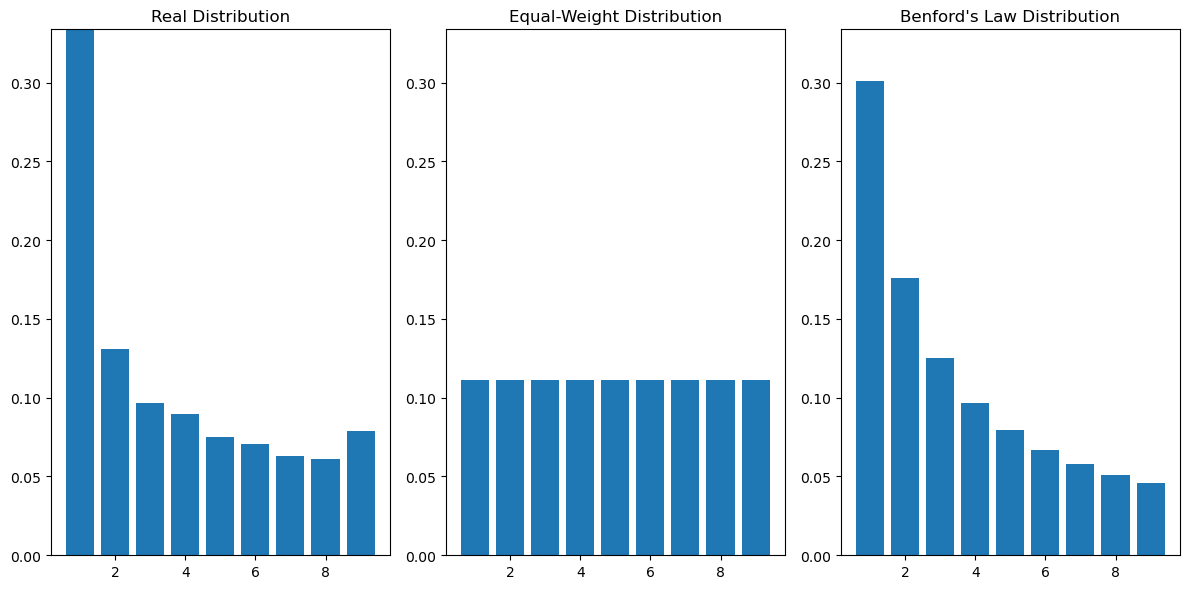

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is loaded

# Extract the leading digit
def leading_digit(number):
    return int(str(number).lstrip('0.')[0])

# Real distribution of leading digits
df['LeadingDigit'] = df['PRICE_RETAIL'].dropna().apply(leading_digit)
real_distribution = df['LeadingDigit'].value_counts(normalize=True).sort_index()

# Equal-weight distribution (1/9 for each digit)
equal_weight = np.full(9, 1/9)

# Benford's Law distribution
benford = np.array([np.log10(1 + 1/d) for d in range(1, 10)])

# Get the maximum y-axis value to ensure the same y-axis for all plots
max_y = max(real_distribution.values.max(), equal_weight.max(), benford.max())

# Plot histograms
plt.figure(figsize=(12, 6))

# Real distribution
plt.subplot(1, 3, 1)
plt.bar(real_distribution.index, real_distribution.values)
plt.ylim(0, max_y)  # Set the same y-axis limit
plt.title('Real Distribution')

# Equal-weight distribution
plt.subplot(1, 3, 2)
plt.bar(range(1, 10), equal_weight)
plt.ylim(0, max_y)  # Set the same y-axis limit
plt.title('Equal-Weight Distribution')

# Benford's Law distribution
plt.subplot(1, 3, 3)
plt.bar(range(1, 10), benford)
plt.ylim(0, max_y)  # Set the same y-axis limit
plt.title('Benford\'s Law Distribution')

# Adjust the layout to avoid overlap
plt.tight_layout()
plt.savefig('q5.png', dpi=100)
plt.show()


# 6

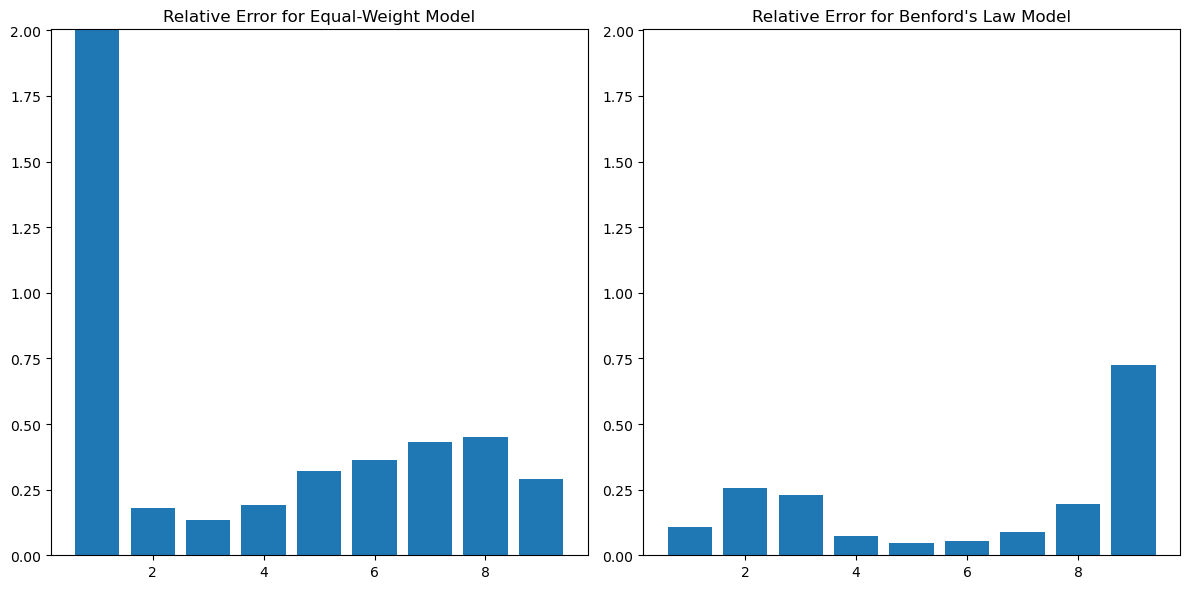

In [15]:
# Compute real frequencies
real_freq = real_distribution.values

# Relative error for equal-weight model
relative_error_model1 = np.abs(real_freq - equal_weight) / equal_weight

# Relative error for Benford's Law model
relative_error_model2 = np.abs(real_freq - benford) / benford

# Get the maximum y-axis value to ensure the same y-axis for both plots
max_y = max(relative_error_model1.max(), relative_error_model2.max())

# Plot histograms
plt.figure(figsize=(12, 6))

# Relative error for Model 1 (Equal-Weight)
plt.subplot(1, 2, 1)
plt.bar(range(1, 10), relative_error_model1)
plt.ylim(0, max_y)  # Set the same y-axis limit
plt.title('Relative Error for Equal-Weight Model')

# Relative error for Model 2 (Benford)
plt.subplot(1, 2, 2)
plt.bar(range(1, 10), relative_error_model2)
plt.ylim(0, max_y)  # Set the same y-axis limit
plt.title('Relative Error for Benford\'s Law Model')

# Adjust the layout to avoid overlap
plt.tight_layout()
plt.savefig('q6.png', dpi=100)
plt.show()


# 7

In [19]:
def rmse(model):
    return np.sqrt(np.mean((real_freq - model)**2))

# RMSE for Model 1 (Equal-Weight)
rmse_model1 = rmse(equal_weight)

# RMSE for Model 2 (Benford's Law)
rmse_model2 = rmse(benford)

print(f"RMSE for Model 1 (Equal-Weight): {rmse_model1}")
print(f"RMSE for Model 2 (Benford's Law): {rmse_model2}")

#The RMSE (Root Mean Squared Error) results indicate that Model 2 (Benford's Law) is a better fit for the real distribution of leading digits than Model 1 (Equal-Weight).

RMSE for Model 1 (Equal-Weight): 0.08123870719088272
RMSE for Model 2 (Benford's Law): 0.024099504224252825


# 8

In [47]:
import numpy as np
import pandas as pd

# Assuming 'df' is already loaded and contains the dataset

# Function to extract leading digit
def leading_digit(number):
    return int(str(number).lstrip('0.')[0])

# Define three categories of choice
chosen_categories = ['Shoes', 'Handbags', 'Jewelry']

# Define the equal-weight and Benford's Law distributions
P = np.full(9, 1/9)  # Equal-weight distribution
π = np.array([np.log10(1 + 1/d) for d in range(1, 10)])  # Benford's Law distribution

# Initialize dictionary to store RMSE results
rmse_results = {}

# For each chosen category, compute F (real distribution), P (equal-weight), and π (Benford's Law)
for category in chosen_categories:
    # Filter data for the chosen category and extract the leading digits from PRICE_RETAIL
    category_prices = df[df['CATEGORY'] == category]['PRICE_RETAIL'].dropna()
    category_digits = category_prices.apply(leading_digit)
    
    # F: Real distribution of leading digits
    F = category_digits.value_counts(normalize=True).sort_index()
    
    # Compute RMSE for Equal-Weight (P) and Benford's Law (π)
    rmse_p = np.sqrt(np.mean((F - P[:len(F)])**2))
    rmse_b = np.sqrt(np.mean((F - π[:len(F)])**2))
    
    # Store RMSE results for both models
    rmse_results[category] = {"RMSE for Equal-Weight": rmse_p, "RMSE for Benford": rmse_b}

# Print the RMSE results
for category, rmse_values in rmse_results.items():
    print(f"Category: {category}")
    print(f"  RMSE for Equal-Weight Model: {rmse_values['RMSE for Equal-Weight']:.6f}")
    print(f"  RMSE for Benford's Law Model: {rmse_values['RMSE for Benford']:.6f}")
    print("-" * 40)

# Part b: Find which category is closest to equal weight (P) using RMSE
closest_category_to_P = min(rmse_results, key=lambda category: rmse_results[category]['RMSE for Equal-Weight'])

# Output the result
print(f"The category closest to the equal-weight distribution (P) is: {closest_category_to_P}")
print(f"  RMSE for Equal-Weight Model: {rmse_results[closest_category_to_P]['RMSE for Equal-Weight']:.6f}")


Category: Shoes
  RMSE for Equal-Weight Model: 0.151068
  RMSE for Benford's Law Model: 0.094585
----------------------------------------
Category: Handbags
  RMSE for Equal-Weight Model: 0.092501
  RMSE for Benford's Law Model: 0.017991
----------------------------------------
Category: Jewelry
  RMSE for Equal-Weight Model: 0.062386
  RMSE for Benford's Law Model: 0.025610
----------------------------------------
The category closest to the equal-weight distribution (P) is: Jewelry
  RMSE for Equal-Weight Model: 0.062386


# 9

1. **Relative Errors:**

   The Relative Error for the Equal-Weight Model is significantly larger, especially for the leading digit "1". This is because the equal-weight model assumes that every digit should appear with the same frequency, which contradicts real-world patterns where lower digits (like 1 and 2) tend to occur more frequently.  
   The Relative Error for Benford’s Law is much smaller, indicating that it more accurately captures the distribution of the leading digits, particularly the dominance of "1" as the leading digit in real-world data.

2. **Comparison Between Models:**

   - **RMSE for Equal-Weight Model**: 0.0812  
   - **RMSE for Benford’s Law Model**: 0.0241  

   This shows that Benford’s Law (Model 2) provides a much better fit for the leading digit distribution in the dataset compared to the Equal-Weight Model (Model 1). The lower RMSE value for Benford’s Law indicates a smaller deviation from the actual distribution of leading digits, which is expected since Benford’s Law often applies to real-world data that spans multiple orders of magnitude.

3. **Per-Category Analysis:**

   a) **Shoes**: The RMSE for Benford’s Law (0.0946) is lower than the RMSE for the Equal-Weight Model (0.1511), indicating a closer fit to Benford's Law.  
   b) **Handbags**: The Benford’s Law Model (0.0180) performs significantly better than the Equal-Weight Model (0.0925).  
   c) **Jewelry**: This category is closest to the Equal-Weight Model (0.0624 RMSE), but even here, Benford’s Law provides a better fit (0.0256 RMSE).

Benford’s Law is a significantly better model for predicting the distribution of leading digits in the data, as demonstrated by the lower RMSE values across all categories.  
While the Equal-Weight Model does have one category (Jewelry) that is somewhat closer, it is still outperformed by Benford’s Law.  
The distribution of prices in the dataset seems to follow a logarithmic pattern, where smaller leading digits are far more common than larger ones.